<a href="https://colab.research.google.com/github/sriramreddy-7/ATTENDANCE--PORTAL/blob/main/JC_AI-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd

import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
data_dir = '/content/drive/MyDrive/J_CompAIML/DATASET/BTDS'
classes = ['BrainTumor', 'Healthy']
num_classes = len(classes)
img_size = (150,150)

In [ ]:
X = []
y = []
for i in range(num_classes):
    path = os.path.join(data_dir, classes[i])
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_array, (150, 150))
        X.append(img_resized)
        y.append(i)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape,y.shape)

(4612, 150, 150) (4612,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **KNN**

In [ ]:
clf = KNeighborsClassifier()
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
    

In [ ]:
print('Accuracy:', acc_knn)

Accuracy: 0.8927410617551462


<Axes: >

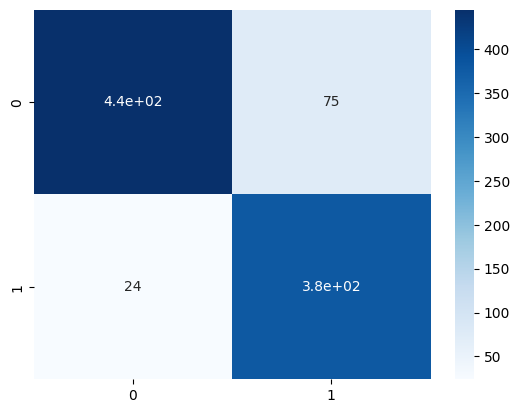

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_knn, annot=True, cmap='Blues')

In [66]:
print(cm_knn)

[[445  75]
 [ 24 379]]


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

## **SVM**-***Support Vector Machine***

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
     
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy:", acc_svm)

Accuracy: 0.952329360780065


In [ ]:
print("Accuracy:", round(acc_svm*100,4),"%")

Accuracy: 95.2329 %


In [ ]:
cm_svm = confusion_matrix(y_test, y_pred)


In [ ]:
print("Confusion Matrix:\n", cm_svm)

Confusion Matrix:
 [[494  26]
 [ 18 385]]


<Axes: >

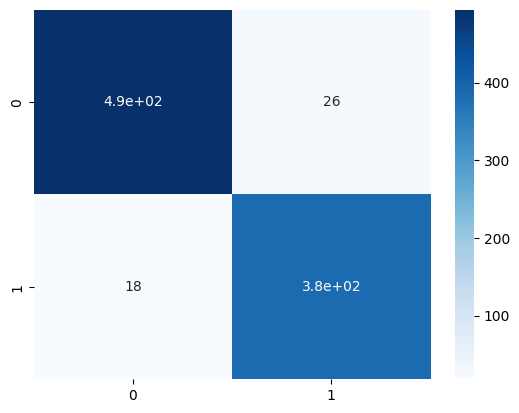

In [65]:
sns.heatmap(cm_svm, annot=True, cmap='Blues')

# **Decision-Tree**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)

In [ ]:
print('Accuracy:', acc_dt)
print('Accuracy Percentage:', round(acc_dt*100,3),"%")

Accuracy: 0.8992416034669556
Accuracy Percentage: 89.924 %


<Axes: >

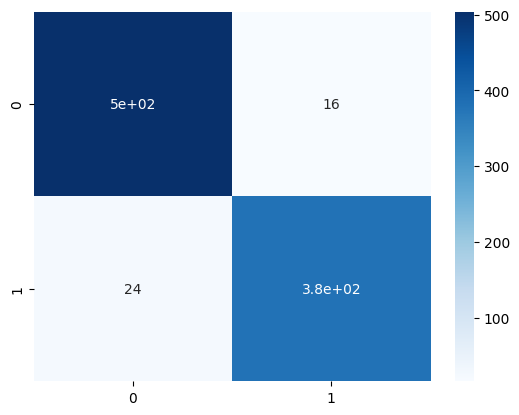

In [64]:
cm_dt = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_dt, annot=True, cmap='Blues')

In [67]:
print(cm_dt)

[[504  16]
 [ 24 379]]


# **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lgr = LogisticRegression()

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

model_lgr.fit(X_train_flat, y_train)


y_pred = model_lgr.predict(X_test_flat)


acc_lgr = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Accuracy:', acc_lgr)
print('Accuracy Percentage:',round(acc_lgr*100,3),"%")

Accuracy: 0.9458288190682557
Accuracy Percentage: 94.583 %


<Axes: >

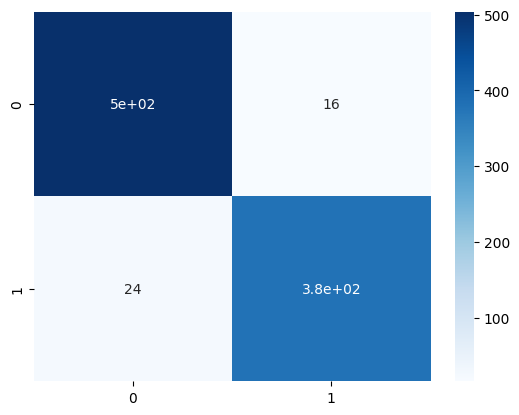

In [63]:
cm_lr = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_lr, annot=True, cmap='Blues')

In [68]:
print(cm_lr)

[[504  16]
 [ 24 379]]


# **Naive_Bayes_Classification**

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model_nbc = GaussianNB()

model_nbc.fit(X_train, y_train)

y_pred = model_nbc.predict(X_test)

acc_nbc = accuracy_score(y_test, y_pred)

In [38]:
print("Accuracy Naive_Bayes_Classification :",acc_nbc)

Accuracy Naive_Bayes_Classification : 0.570964247020585


<Axes: >

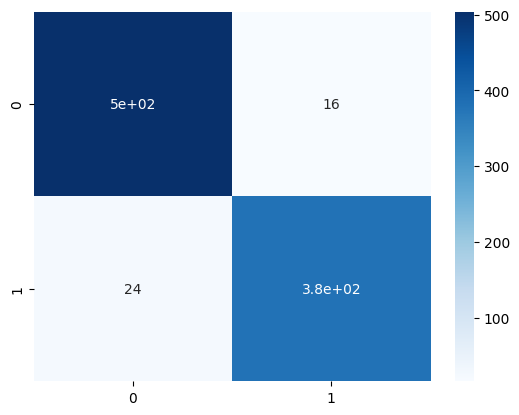

In [49]:
cm_nbc = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_nbc, annot=True, cmap="Blues")

# Random Forest Classification 

In [40]:
data_dir = '/content/drive/MyDrive/J_CompAIML/DATASET/BTDS'
classes = ['BrainTumor', 'Healthy']
num_classes = len(classes)

X = []
y = []
for i in range(num_classes):
    path = os.path.join(data_dir, classes[i])
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resized = cv2.resize(img_array, (150, 150))
        X.append(img_resized)
        y.append(i)



In [41]:
X = np.array(X)
y = np.array(y)

In [42]:
print(X.shape,y.shape)

(4612, 150, 150) (4612,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train.reshape(X_train.shape[0], -1), y_train)



RandomForestClassifier(random_state=42)

In [46]:
y_pred = rfc.predict(X_test.reshape(X_test.shape[0], -1))

accuracy_rfc = (y_pred == y_test).mean()



<Axes: >

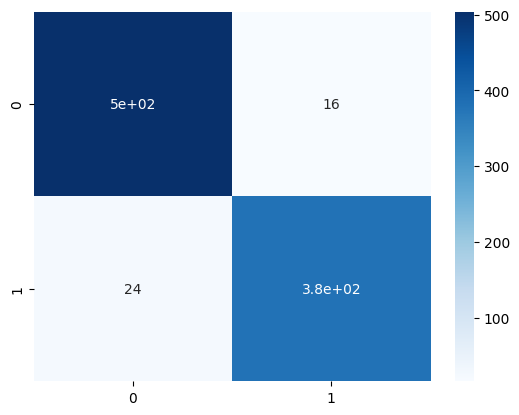

In [50]:
cm_rfc = confusion_matrix(y_test, y_pred)

sns.heatmap(cm_rfc, annot=True, cmap="Blues")

In [51]:
print("Accuracy Random Forest:", accuracy_rfc)

Accuracy Random Forest: 0.9566630552546046


In [52]:
print("Accuracy Random Forest:", round(accuracy_rfc,4)*100)

Accuracy Random Forest: 95.67


In [53]:
import numpy as np
import matplotlib.pyplot as plt


In [54]:
algorithms=['KNN','SVM','DecisionTree','Logistic','Naive_Bayes','Random Forest']
accuracy_list=[acc_knn,acc_svm,acc_dt,acc_lgr,acc_nbc,accuracy_rfc]

In [55]:
final_accuracy=[]
for i in accuracy_list:
  final_accuracy.append(i*100)

In [56]:
print(final_accuracy)

[89.27410617551462, 95.2329360780065, 88.94907908992417, 94.58288190682556, 57.0964247020585, 95.66630552546046]


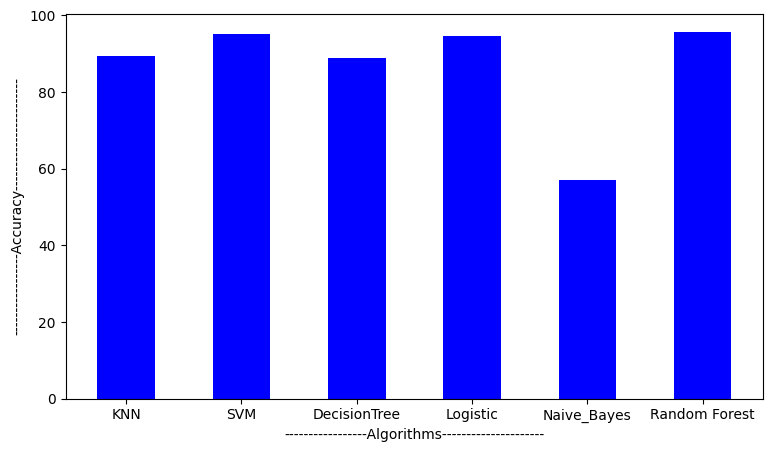

In [57]:
courses =algorithms
values = final_accuracy
fig = plt.figure(figsize = (9,5))
plt.bar(courses, values, color ='blue',width = 0.50)
plt.xlabel("-----------------Algorithms---------------------")
plt.ylabel("-----------------Accuracy-----------------------")
plt.show("Algorithm Accuacy Graph")

In [58]:
print(max(final_accuracy))

95.66630552546046


In [59]:
print(algorithms[final_accuracy.index(max(final_accuracy))])

Random Forest


In [60]:
print(algorithms[final_accuracy.index(max(final_accuracy))],"is obtained highest accuracy with",round(max(final_accuracy),4),"%")

Random Forest is obtained highest accuracy with 95.6663 %


In [61]:
img_path = "/content/img_file.png"
img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img_array, (150, 150))
img = img_resized.flatten().reshape(1, -1)
prediction = rfc.predict(img)


In [62]:
if prediction[0] == 0:
    print("The MRI image is predicted to have a brain tumor.")
else:
    print("The MRI image is predicted to be healthy.")

The MRI image is predicted to have a brain tumor.
